In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn.neighbors import KDTree
from sklearn.cluster import DBSCAN
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
from sklearn.manifold import TSNE

In [2]:
from sklearn.metrics import accuracy_score
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 700)
pd.set_option('display.width', 1000)

## 0. Data processing and visualization
1. Investigate the ratings.csv dataset, transform it to $(M,N)$ matrix so that each row represents a movie and each column represents a user. So M = number of unique movies, N = number of unique users. $r_{ij}$ is the rating j-th user gave to i-th movie.
2. Fill N/A values with 0.0
3. Investigate the resulting dataset, remove uninformative columns if any.
4. Perform exploratory analysis on the dataset.(correlation matrix, summary statistics barplots of features)

In [3]:
original_data = pd.read_csv('movielens_small_dataset/ratings.csv')
original_data

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [4]:
original_data.drop(['timestamp', 'rating'], axis=1, inplace=True)

In [5]:
original_data

,userId,movieId
0,1,1
1,1,3
2,1,6
3,1,47
4,1,50
...,...,...
100831,610,166534
100832,610,168248
100833,610,168250
100834,610,168252


In [6]:
X = pd.get_dummies(original_data, columns=['userId'])

###### Check if there are NA values

In [7]:
X.isna().sum().unique()

array([0])

In [8]:
len(original_data), len(X)

(100836, 100836)

In [9]:
X

,movieId,userId_1,userId_2,userId_3,userId_4,userId_5,userId_6,userId_7,userId_8,userId_9,userId_10,userId_11,userId_12,userId_13,userId_14,userId_15,userId_16,userId_17,userId_18,userId_19,userId_20,userId_21,userId_22,userId_23,userId_24,userId_25,userId_26,userId_27,userId_28,userId_29,userId_30,userId_31,userId_32,userId_33,userId_34,userId_35,userId_36,userId_37,userId_38,userId_39,userId_40,userId_41,userId_42,userId_43,userId_44,userId_45,userId_46,userId_47,userId_48,userId_49,userId_50,userId_51,userId_52,userId_53,userId_54,userId_55,userId_56,userId_57,userId_58,userId_59,userId_60,userId_61,userId_62,userId_63,userId_64,userId_65,userId_66,userId_67,userId_68,userId_69,userId_70,userId_71,userId_72,userId_73,userId_74,userId_75,userId_76,userId_77,userId_78,userId_79,userId_80,userId_81,userId_82,userId_83,userId_84,userId_85,userId_86,userId_87,userId_88,userId_89,userId_90,userId_91,userId_92,userId_93,userId_94,userId_95,userId_96,userId_97,userId_98,userId_99,userId_100,userId_101,userId_102,userId_103,userId_104,userId_105,userId_106,userId_107,userId_108,userId_109,userId_110,userId_111,userId_112,userId_113,userId_114,userId_115,userId_116,userId_117,userId_118,userId_119,userId_120,userId_121,userId_122,userId_123,userId_124,userId_125,userId_126,userId_127,userId_128,userId_129,userId_130,userId_131,userId_132,userId_133,userId_134,userId_135,userId_136,userId_137,userId_138,userId_139,userId_140,userId_141,userId_142,userId_143,userId_144,userId_145,userId_146,userId_147,userId_148,userId_149,userId_150,userId_151,userId_152,userId_153,userId_154,userId_155,userId_156,userId_157,userId_158,userId_159,userId_160,userId_161,userId_162,userId_163,userId_164,userId_165,userId_166,userId_167,userId_168,userId_169,userId_170,userId_171,userId_172,userId_173,userId_174,userId_175,userId_176,userId_177,userId_178,userId_179,userId_180,userId_181,userId_182,userId_183,userId_184,userId_185,userId_186,userId_187,userId_188,userId_189,userId_190,userId_191,userId_192,userId_193,userId_194,userId_195,userId_196,userId_197,userId_198,userId_199,userId_200,userId_201,userId_202,userId_203,userId_204,userId_205,userId_206,userId_207,userId_208,userId_209,userId_210,userId_211,userId_212,userId_213,userId_214,userId_215,userId_216,userId_217,userId_218,userId_219,userId_220,userId_221,userId_222,userId_223,userId_224,userId_225,userId_226,userId_227,userId_228,userId_229,userId_230,userId_231,userId_232,userId_233,userId_234,userId_235,userId_236,userId_237,userId_238,userId_239,userId_240,userId_241,userId_242,userId_243,userId_244,userId_245,userId_246,userId_247,userId_248,userId_249,userId_250,userId_251,userId_252,userId_253,userId_254,userId_255,userId_256,userId_257,userId_258,userId_259,userId_260,userId_261,userId_262,userId_263,userId_264,userId_265,userId_266,userId_267,userId_268,userId_269,userId_270,userId_271,userId_272,userId_273,userId_274,userId_275,userId_276,userId_277,userId_278,userId_279,userId_280,userId_281,userId_282,userId_283,userId_284,userId_285,userId_286,userId_287,userId_288,userId_289,userId_290,userId_291,userId_292,userId_293,userId_294,userId_295,userId_296,userId_297,userId_298,userId_299,userId_300,userId_301,userId_302,userId_303,userId_304,userId_305,userId_306,userId_307,userId_308,userId_309,userId_310,userId_311,userId_312,userId_313,userId_314,userId_315,userId_316,userId_317,userId_318,userId_319,userId_320,userId_321,userId_322,userId_323,userId_324,userId_325,userId_326,userId_327,userId_328,userId_329,userId_330,userId_331,userId_332,userId_333,userId_334,userId_335,userId_336,userId_337,userId_338,userId_339,userId_340,userId_341,userId_342,userId_343,userId_344,userId_345,userId_346,userId_347,userId_348,userId_349,userId_350,userId_351,userId_352,userId_353,userId_354,userId_355,userId_356,userId_357,userId_358,userId_359,userId_360,userId_361,userId_362,userId_363,userId_364,userId_365,userId_366,userId_367,userId_368,userId_369,userId_370,userId_371,userId_372,userId_

Correlation matrix of original_data

In [10]:
original_data.corr()

,userId,movieId
userId,1.000000,0.006773
movieId,0.006773,1.000000


In [11]:
original_data

,userId,movieId
0,1,1
1,1,3
2,1,6
3,1,47
4,1,50
...,...,...
100831,610,166534
100832,610,168248
100833,610,168250
100834,610,168252


In [12]:
def plot_histogram(data, step, xlabel, ylabel, title, figsize=(20,10)):
    bins = [i for i in range(data.min(), data.max(), step)]
    plt.figure(figsize=figsize)
    plt.hist(data, bins=bins, histtype = "bar", rwidth = 0.8, color = "c")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(bins)
    plt.title(title)
    plt.show()

In [13]:
def plot_bar(x,y, xlabel=None, ylabel=None, title=None, figsize=(20,10)):
    plt.figure(figsize=figsize)
    plt.bar(x,y, color = "b")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [14]:
y=original_data['userId'].value_counts()
x = y.index

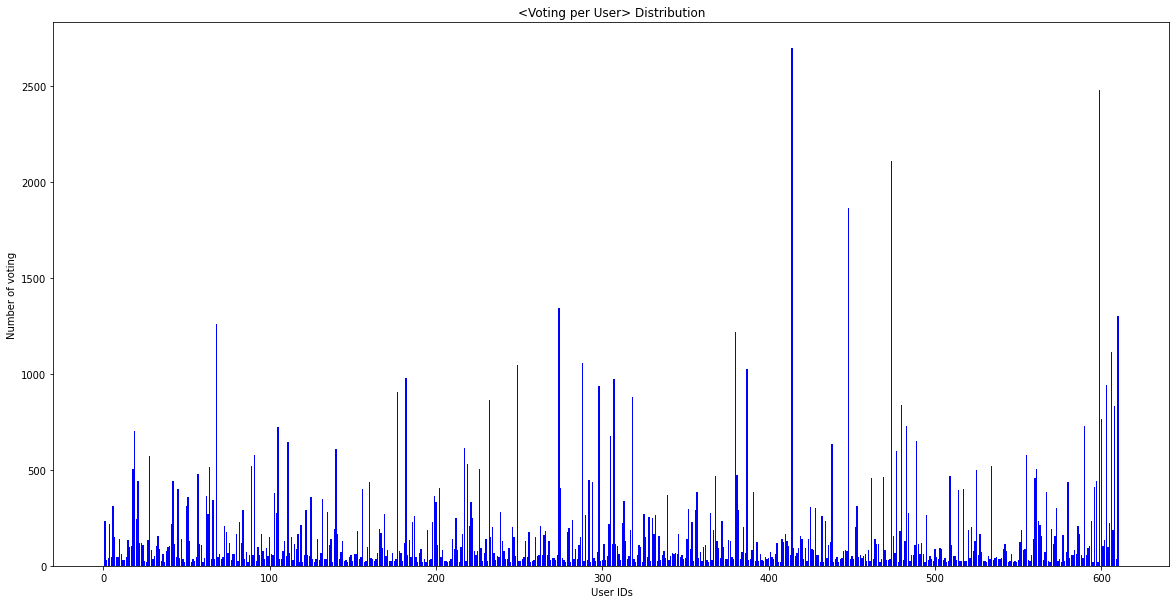

In [15]:
plot_bar(
    x=x,
    y=y,
    xlabel='User IDs',
    ylabel='Number of voting',
    title ='<Voting per User> Distribution'
)

In [16]:
y=original_data['movieId'].value_counts()[:100]
x=y.index

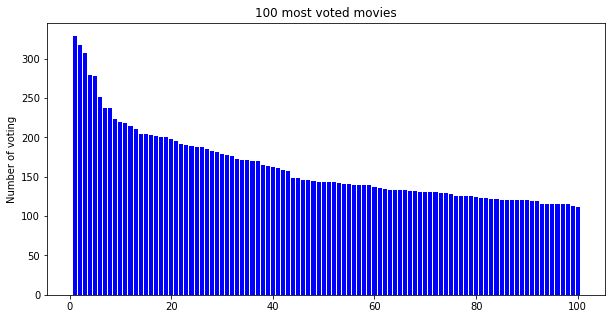

In [17]:
plot_bar(
    x=list(range(1,101)),
    y=y.values,
    ylabel='Number of voting',
    title ='100 most voted movies',
    figsize=(10,5)
)

## 1. Reducing Dimentionality of Data
All clustering algorithms benefit from dimensionality reduction. In this task perform PCA and project the dataset to lower dimension. Preserve at least 0.9 of initial variance

### Reducing rows number to 10_000 because silhouette score gets hanged on 100_000 samples

In [18]:
X_reduced = shuffle(X, random_state=0)[:10_000]

In [19]:
pca_0_9 = PCA(n_components=0.9)

In [20]:
X_0_9 = pca_0_9.fit_transform(X_reduced)

In [21]:
X_0_9.shape

(10000, 1)

In [22]:
pca_3 = PCA(n_components=3)

In [23]:
X3 = pca_3.fit_transform(X_reduced)

In [24]:
X3.shape

(10000, 3)

In [25]:
pca_0_9.explained_variance_ratio_

array([1.])

In [26]:
pca_3.explained_variance_ratio_

array([9.99999999e-01, 2.30488580e-11, 2.09848149e-11])

## 2. Clustering
1. On the projected dataset fit KMeans, choose the best k from values $1,2,...,30$, report silhouette score of the best k
2. On the projected dataset decide minPts and eps, afterwards fit DBSCAN with chosen params, report the silhouette score
3. On the projected dataset fit 3 affinity propagation models, by setting preference to minimum of similarity matrix, mean of similarity matrix, median of similarity matrix.
Report the silhouette scores and choose the best one according to it.
4. Use scipy.cluster.hierarchy.linkage and scipy.cluster.hierarchy.dendrogram to plot dendrograms for [single, average, ward] linkages. Choose best k for each linkages from the dendrograms. Fit aglomerative clustering using the k-s that you chose. Report the three silhouette scores and choose the best model. Use the projected dataset for this task too.


### Step 1

On the projected dataset fit KMeans, choose the best k from values  1,2,...,30 , report silhouette score of the best k

In [27]:
K=30

In [28]:
def find_best_k_from_distortion_ratio(inertia):
    best_k = 1
    min_ratio = np.abs(inertia[0]-inertia[1])
    for i in range(1, len(inertia)-1):
        curr_ratio = np.abs(inertia[i] - inertia[i+1])/np.abs(inertia[i-1]-inertia[i])
        if curr_ratio < min_ratio:
            min_ratio = curr_ratio
            best_k = i+1
    return best_k

In [77]:
inertia = []
for k in range(1, K+2):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X3)
    labels = kmeans.labels_
    if k>1:
        print('k: ', str(k), 'silhouettte score: ', str(silhouette_score(X3, labels, metric='euclidean')))
    inertia.append(np.sqrt(kmeans.inertia_))


k:  2 silhouettte score:  0.8468597079663314
k:  3 silhouettte score:  0.8536434179376056
k:  4 silhouettte score:  0.8573132596270959
k:  5 silhouettte score:  0.8425864259524045
k:  6 silhouettte score:  0.8400518349377076
k:  7 silhouettte score:  0.840369087963574
k:  8 silhouettte score:  0.8408086937661737
k:  9 silhouettte score:  0.6364542989555378
k:  10 silhouettte score:  0.636042835925969
k:  11 silhouettte score:  0.6383367584481632
k:  12 silhouettte score:  0.6396297201170738
k:  13 silhouettte score:  0.6041239036110447
k:  14 silhouettte score:  0.6039586852732598
k:  15 silhouettte score:  0.6017071082849373
k:  16 silhouettte score:  0.5988998555568948
k:  17 silhouettte score:  0.5981925560842979
k:  18 silhouettte score:  0.6018433098518764
k:  19 silhouettte score:  0.6048088784132161
k:  20 silhouettte score:  0.5924565665432506
k:  21 silhouettte score:  0.5860502012701561
k:  22 silhouettte score:  0.5928456112332137
k:  23 silhouettte score:  0.589328873134672

In [30]:
best_k = find_best_k_from_distortion_ratio(inertia)
best_k

2

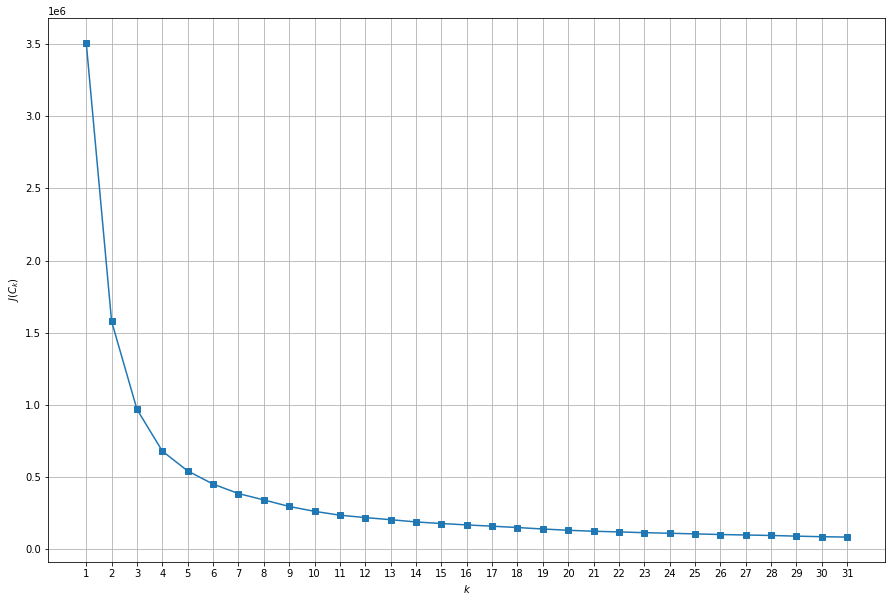

In [31]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(range(1, K+2), inertia, marker='s');
plt.xlabel('$k$')
plt.xticks(range(1, K+2))
plt.ylabel('$J(C_k)$');
plt.show()

### As we see best_k from elbow method and from silhouette score are dismatched. We take k_best = 4

### Step 2

On the projected dataset decide minPts and eps, afterwards fit DBSCAN with chosen params, report the silhouette score

In [32]:
numPts = X3.shape[1]*2
numPts

6

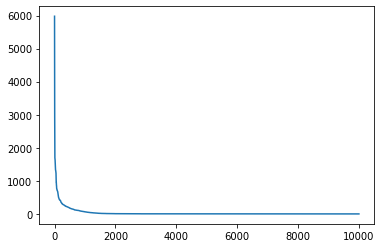

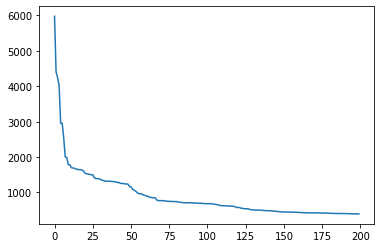

In [33]:
tree = KDTree(X3)
dist, ind = tree.query(X3, k=numPts)
plt.plot(np.arange(X3.shape[0]), -1 * np.sort(-1*dist.max(axis=1)))
plt.show()
plt.plot(np.arange(X3.shape[0])[:200], -1 * np.sort(-1*dist.max(axis=1))[:200])
plt.show()

In [34]:
eps = 1400

In [35]:
model = DBSCAN(eps=eps, min_samples=numPts)
labels = model.fit_predict(X3)

In [36]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8])

In [37]:
silhouette_score(X3, labels, metric='euclidean')

0.698518517146933

### Step 3

On the projected dataset fit 3 affinity propagation models, by setting preference to minimum of similarity matrix, mean of similarity matrix, median of similarity matrix

In [38]:
X3_reduced = shuffle(X3, random_state=0)[:1_000]

In [39]:
af = AffinityPropagation(preference=-50).fit(X3_reduced)

/home/karen/anaconda3/envs/ml_beginner_course/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning)
/home/karen/anaconda3/envs/ml_beginner_course/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:244: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)


In [40]:
af.affinity_matrix_.shape

(1000, 1000)

In [41]:
min_ = af.affinity_matrix_.min()
min_

-32810975044.030148

In [42]:
mean_ = af.affinity_matrix_.mean()
mean_

-2443029630.659292

In [43]:
af_median = AffinityPropagation(max_iter=1000, random_state=0).fit(X3_reduced)

/home/karen/anaconda3/envs/ml_beginner_course/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:244: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)


In [44]:
af_min = AffinityPropagation(max_iter=1000, preference=min_, random_state=0).fit(X3_reduced)

/home/karen/anaconda3/envs/ml_beginner_course/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:244: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)


In [45]:
af_mean = AffinityPropagation(max_iter=1000, preference=mean_, random_state=0).fit(X3_reduced)

/home/karen/anaconda3/envs/ml_beginner_course/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:244: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)


### Lets visualize original data with 100_000 samples to 1 dimension with PCA to see if clustering matters

In [81]:
pca_new = PCA(n_components=0.9)

In [82]:
X_new = pca_new.fit_transform(X)

In [50]:
pca_new.explained_variance_ratio_

array([1.])

In [83]:
kmeans_new = KMeans(n_clusters=4, random_state=1).fit(X_new)
labels = kmeans_new.labels_

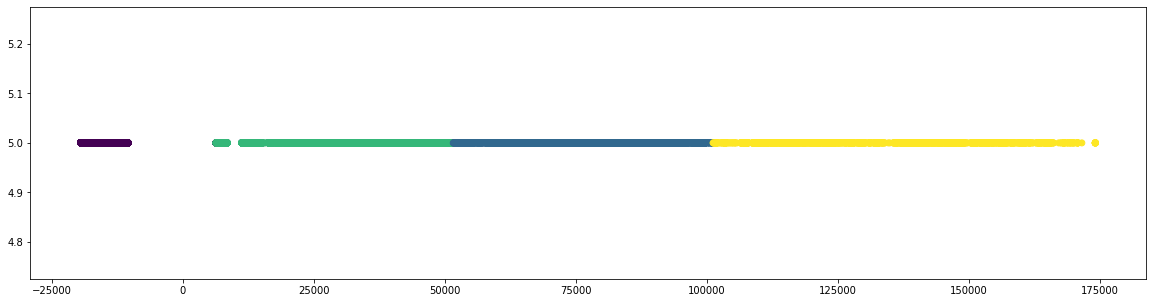

In [84]:
plt.figure(figsize=(20,5))
plt.scatter(X_new[:,0], [5]*len(X_new), c=labels)
plt.show()

### Step 4

Use scipy.cluster.hierarchy.linkage and scipy.cluster.hierarchy.dendrogram to plot dendrograms for [single, average, ward] linkages. Choose best k for each linkages from the dendrograms. Fit aglomerative clustering using the k-s that you chose. Report the three silhouette scores and choose the best model. Use the projected dataset for this task too.

In [90]:
distance_mat = pdist(X3_reduced) 
Z1 = hierarchy.linkage(distance_mat, 'single')
Z2 = hierarchy.linkage(distance_mat, 'average')
Z3 = hierarchy.linkage(distance_mat, 'ward')

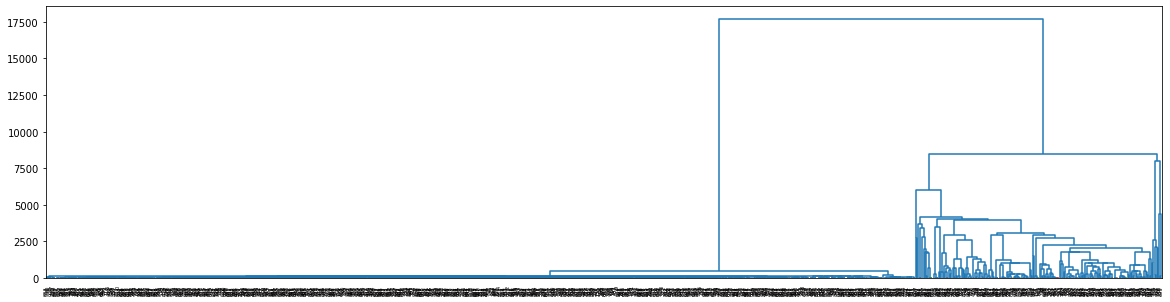

In [92]:
plt.figure(figsize=(20, 5))
dn = hierarchy.dendrogram(Z1, color_threshold=0.5)
plt.show()

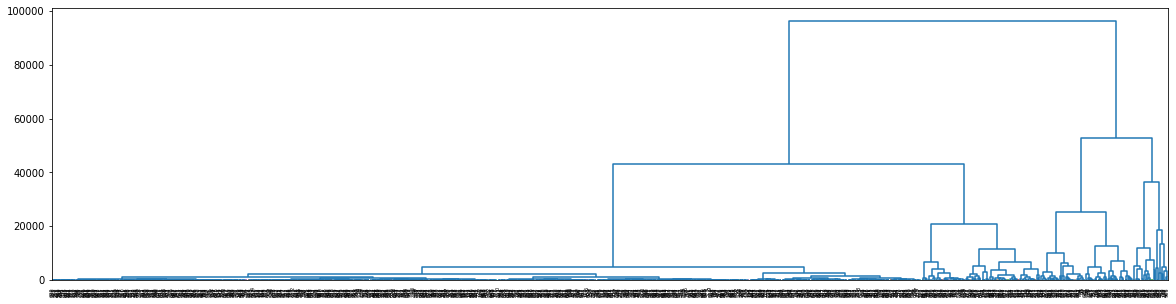

In [93]:
plt.figure(figsize=(20, 5))
d1 = hierarchy.dendrogram(Z2, color_threshold=0.5)
plt.show()

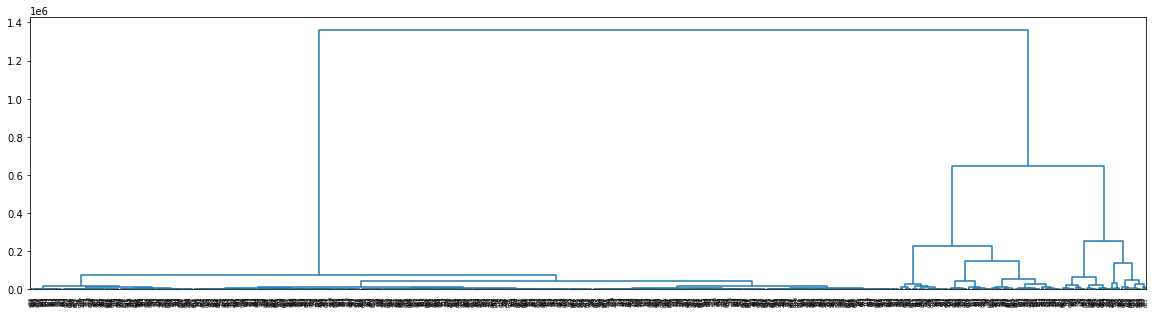

In [94]:
plt.figure(figsize=(20, 5))
d1 = hierarchy.dendrogram(Z3, color_threshold=0.5)
plt.show()

In [95]:
k1 = 4
k2 = 3
k3 = 3

In [99]:
aggl1 = AgglomerativeClustering(n_clusters=k1).fit(X3)

In [102]:
labels_aggl1 = aggl1.labels_

In [100]:
aggl2 = AgglomerativeClustering(n_clusters=k2).fit(X3)

In [103]:
labels_aggl2 = aggl2.labels_

In [101]:
aggl3 = AgglomerativeClustering(n_clusters=k3).fit(X3)

In [104]:
labels_aggl3 = aggl3.labels_

In [105]:
silhouette_score(X3, labels_aggl1, metric='euclidean')

0.8550572036399015

In [106]:
silhouette_score(X3, labels_aggl2, metric='euclidean')

0.8444198318663317

In [107]:
silhouette_score(X3, labels_aggl3, metric='euclidean')

0.8444198318663317

## 3. Performing clustering and visualising the clusters
1. Use the projected dataset you got from task 1 project it to 2D using t-SNE(sklearn.manifold.TSNE). On the t-SNE projected dataset perform the same tasks as in task 2. 
2. Make four scatter plots for the four best models you got in task 3.1, by coloring points according to their cluster.
3. Using the model with the best silhouette score examine some movies that are in the same cluster, what do the clusters show?

### Step 1

In [116]:
X_embedded = TSNE(n_components=2).fit_transform(X3)

In [117]:
X_embedded.shape

(10000, 2)

In [119]:
inertia = []
for k in range(1, K+2):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X_embedded)
    labels = kmeans.labels_
    if k>1:
        print('k: ', str(k), 'silhouettte score: ', str(silhouette_score(X_embedded, labels, metric='euclidean')))
    inertia.append(np.sqrt(kmeans.inertia_))


k:  2 silhouettte score:  0.33743644
k:  3 silhouettte score:  0.3645626
k:  4 silhouettte score:  0.36145806
k:  5 silhouettte score:  0.3420153
k:  6 silhouettte score:  0.36534062
k:  7 silhouettte score:  0.35752562
k:  8 silhouettte score:  0.34947693
k:  9 silhouettte score:  0.35244125
k:  10 silhouettte score:  0.35186622
k:  11 silhouettte score:  0.35023087
k:  12 silhouettte score:  0.36488277
k:  13 silhouettte score:  0.35822508
k:  14 silhouettte score:  0.36044613
k:  15 silhouettte score:  0.35678053
k:  16 silhouettte score:  0.36671928
k:  17 silhouettte score:  0.35952806
k:  18 silhouettte score:  0.36791465
k:  19 silhouettte score:  0.37204906
k:  20 silhouettte score:  0.36517504
k:  21 silhouettte score:  0.36122692
k:  22 silhouettte score:  0.36744902
k:  23 silhouettte score:  0.37487555
k:  24 silhouettte score:  0.3729541
k:  25 silhouettte score:  0.3794215
k:  26 silhouettte score:  0.38008556
k:  27 silhouettte score:  0.37877285
k:  28 silhouettte score